In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import os

In [95]:
directory = "Datasets/QS"
data_2018 = pd.read_csv(directory+"/2018-QS-World-University-Rankings.csv", encoding='unicode_escape')
data_2019 = pd.read_csv(directory+"/2019-QS-World-University-Rankings.csv", encoding='unicode_escape')
data_2020 = pd.read_csv(directory+"/2020-QS-World-University-Rankings.csv", encoding='unicode_escape')

In [3]:
data_2018.head()

,2018,2017,Institution Name,Country,Classification Size,Focus,Research Intensity,Age,Status,Academic Reputation Score,...,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,Overall Score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


In [4]:
ranks_2017=data_2018['2017']
ranks_2017

0        1
1        2
2        3
3        5
4        4
      ... 
979    NaN
980    NaN
981    NaN
982    NaN
983    NaN
Name: 2017, Length: 984, dtype: object

In [96]:
data_2018=data_2018.drop(columns=['2017'])
data_2019=data_2019.drop(columns=['2018'])
data_2020=data_2020.drop(columns=['2019'])

print("2018 RANKING")
print(data_2018.isnull().sum(axis = 0))
print("2019 RANKING")
print(data_2019.isnull().sum(axis = 0))
print("2020 RANKING")
print(data_2020.isnull().sum(axis = 0))

2018 RANKING
2018                            22
Institution Name                 3
Country                          4
Classification Size              4
Focus                           15
Research Intensity              16
Age                             25
Status                          22
Academic Reputation Score        4
Academic Reputation Rank         4
Employer Reputation Score        4
Employer Reputation Rank         4
Faculty Student Score            4
Faculty Student Rank             4
Citations per Faculty Score      5
Citations per Faculty Rank       5
International Faculty Score     10
International Faculty Rank      10
International Students Score     5
International Students Rank      5
Overall Score                    4
dtype: int64
2019 RANKING
2019                            22
Institution Name                 3
Country                          4
Classification Size              4
Focus                            4
Research Intensity               4
Age             

In [97]:
indexes_2018=[]
indexes_2019=[]
indexes_2020=[]

for i in range(len(data_2018)):
    if data_2018.iloc[i].isnull().sum()>=15:
        indexes_2018.append(i)
for i in range(len(data_2019)):
    if data_2019.iloc[i].isnull().sum()>=15:
        indexes_2019.append(i)
for i in range(len(data_2020)):
    if data_2020.iloc[i].isnull().sum()>=15:
        indexes_2020.append(i)

for i in indexes_2018:
    data_2018=data_2018.drop(index=i)
for i in indexes_2019:
    data_2019=data_2019.drop(index=i)
for i in indexes_2020:
    data_2020=data_2020.drop(index=i)
    
for i in range(len(data_2020)):
    data_2020['Institution Name'].iloc[i]=data_2020['Institution Name'].iloc[i].upper()
    
data_2018['Institution Name'].iloc[0]="MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT)"
    
data_2020

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,2020,Institution Name,Country,Classification Size,Focus,Research Intensity,Age,Status,Academic Reputation Score,Academic Reputation Rank,...,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,Overall Score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,5,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,4,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,1,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5.0,A,100,3,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,97.8,23,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,UNIVERSITÃ© SORBONNE NOUVELLE PARIS 3,France,L,SP,VH,NaN,NaN,37.7,219,...,471,-,-,-,-,NaN,-,98.5,49,-
1020,NaN,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO (UCSF)",United States,S,SP,VH,5.0,A,45.6,174,...,-,100,2,57.5,160,45.3,354,-,-,-
1021,NaN,"UNIVERSITY OF ECONOMICS, PRAGUE",Czech Republic,L,SP,VH,4.0,A,-,-,...,410,-,-,-,-,-,-,43.9,324,-
1022,NaN,WEIZMANN INSTITUTE OF SCIENCE,Israel,S,FO,VH,4.0,A,20.8,398,...,-,100,3,89.4,35,NaN,-,NaN,-,-


In [105]:
indexes_2018=[]
indexes_2019=[]
indexes_2020=[]

for i in range(len(data_2018)):
    if data_2018['Institution Name'].iloc[i] not in data_2019['Institution Name'].unique() or  data_2018['Institution Name'].iloc[i] not in data_2020['Institution Name'].unique():
        indexes_2018.append(i)
        
for i in range(len(data_2019)):
    if data_2019['Institution Name'].iloc[i] not in data_2018['Institution Name'].unique() or  data_2019['Institution Name'].iloc[i] not in data_2020['Institution Name'].unique():
        indexes_2019.append(i)
    
for i in range(len(data_2020)):
    if data_2020['Institution Name'].iloc[i] not in data_2019['Institution Name'].unique() or  data_2020['Institution Name'].iloc[i] not in data_2018['Institution Name'].unique():
        indexes_2020.append(i)

data_2018=data_2018.drop(data_2018.index[indexes_2018])
data_2019=data_2019.drop(data_2019.index[indexes_2019])
data_2020=data_2020.drop(data_2020.index[indexes_2020])
    
data_2018

,2018,Institution Name,Country,Classification Size,Focus,Research Intensity,Age,Status,Academic Reputation Score,Academic Reputation Rank,...,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,Overall Score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,6,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,5,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,1,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,22,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,2,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,NaN,LONDON BUSINESS SCHOOL,United Kingdom,S,SP,VH,4.0,A,-,-,...,-,-,-,-,-,-,-,-,-,-
973,NaN,STOCKHOLM SCHOOL OF ECONOMICS,Sweden,S,SP,VH,5.0,B,-,-,...,-,-,-,-,-,-,-,-,-,-
976,NaN,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO (UCSF)",United States,S,SP,VH,5.0,A,-,-,...,-,-,-,-,-,-,-,-,-,-
978,NaN,WEIZMANN INSTITUTE OF SCIENCE,Israel,S,FO,VH,4.0,A,-,-,...,-,-,-,-,-,-,-,-,-,-


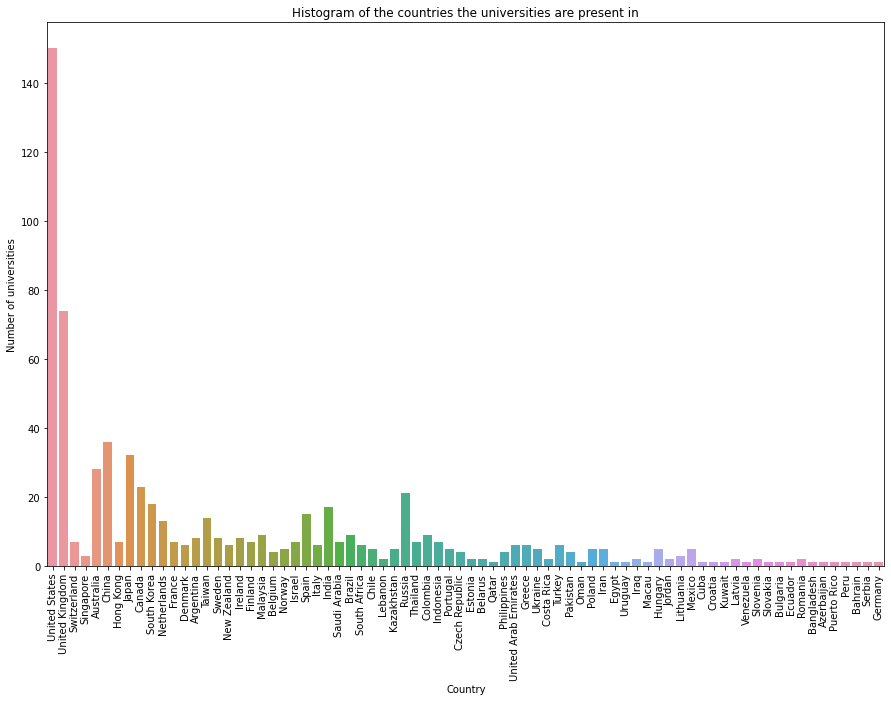

In [153]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.countplot(data=data_2018,x="Country")
plt.title("Histogram of the countries the universities are present in")
plt.ylabel("Number of universities")
plt.show()

Since we are comparing same universities across the years, the distribution of each year will be identical

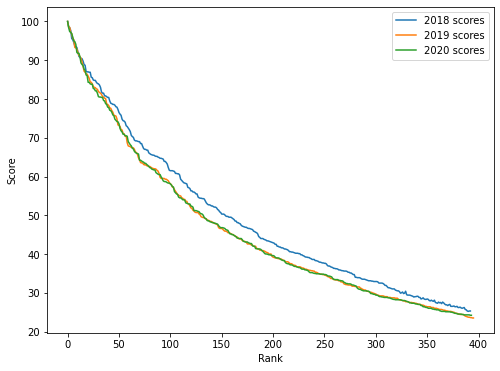

In [146]:
scores_2018=[]
scores_2019=[]
scores_2020=[]
for i in range(len(data_2018)):
    if data_2018['Overall Score'].iloc[i] != '-':
        scores_2018.append(float(data_2018['Overall Score'].iloc[i]))
        
for i in range(len(data_2019)):
    if data_2019['Overall Score'].iloc[i] != '-' and '-' not in data_2019['Overall Score'].iloc[i]:
        scores_2019.append(float(data_2019['Overall Score'].iloc[i]))
        
for i in range(len(data_2020)):
    if data_2020['Overall Score'].iloc[i] != '-' and '-' not in data_2020['Overall Score'].iloc[i]:
        scores_2020.append(float(data_2020['Overall Score'].iloc[i]))
        
plt.figure(figsize=(8, 6))
plt.plot(scores_2018,label="2018 scores")
plt.plot(scores_2019,label="2019 scores")
plt.plot(scores_2020,label="2020 scores")
plt.xlabel("Rank")
plt.ylabel("Score")
plt.legend()
plt.show()

Comparision of the distribution of the scores of the universities according to their rankings, we can see that 2019 and 2020 have almost identical distributions and 2018 is also very similar but the scores are slightly more for latter few values

In [242]:
ranks=["Academic Reputation Rank","Employer Reputation Rank",'Citations per Faculty Rank','Faculty Student Rank','International Faculty Rank','International Students Rank']

data_2018_top=data_2018.head(250)
data_2019_top=data_2019.head(250)
data_2020_top=data_2020.head(250)

for i in range(len(data_2020)):
    for x in ranks:
        if data_2020[x].iloc[i]=='501+':
            data_2020[x].iloc[i]='501'
        if data_2020[x].iloc[i]=='601+':
            data_2020[x].iloc[i]='601'
        if data_2020[x].iloc[i]=='-':
            data_2020[x].iloc[i]=0
            data_2020["2020"].iloc[i]=0
    if '=' in str(data_2020["2020"].iloc[i]):
        data_2020["2020"].iloc[i]=data_2020["2020"].iloc[i][:len(data_2020["2020"].iloc[i])-1]

for i in range(len(data_2019)):
    for x in ranks:
        if data_2019[x].iloc[i]=='501+':
            data_2019[x].iloc[i]='501'
        if data_2019[x].iloc[i]=='601+':
            data_2019[x].iloc[i]='601'
        if data_2019[x].iloc[i]=='-':
            data_2019[x].iloc[i]=0
            data_2019["2019"].iloc[i]=0
    if '=' in str(data_2019["2019"].iloc[i]):
        data_2019["2019"].iloc[i]=data_2019["2019"].iloc[i][:len(data_2019["2019"].iloc[i])-1]

for i in range(len(data_2018)):
    for x in ranks:
        if data_2018[x].iloc[i]=='401+':
            data_2018[x].iloc[i]='401'
        if data_2018[x].iloc[i]=='-':
            data_2018[x].iloc[i]=0
            data_2018["2018"].iloc[i]=0
    if '=' in str(data_2018["2018"].iloc[i]):
        data_2018["2018"].iloc[i]=data_2018["2018"].iloc[i][:len(data_2018["2018"].iloc[i])-1]

losses=pd.DataFrame(columns=['Parameter','Loss','Year'])
for x in ranks:
    losses=losses.append({'Parameter':x,'Loss':np.sqrt(mean_squared_error(data_2018_top[x],data_2018_top['2018'])),'Year':2018},ignore_index=True)
    losses=losses.append({'Parameter':x,'Loss':np.sqrt(mean_squared_error(data_2019_top[x],data_2019_top['2019'])),'Year':2019},ignore_index=True)
    losses=losses.append({'Parameter':x,'Loss':np.sqrt(mean_squared_error(data_2020_top[x],data_2020_top['2020'])),'Year':2020},ignore_index=True)
losses

/Users/kalp_vyas/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Parameter,Loss,Year
0,Academic Reputation Rank,66.802275,2018
1,Academic Reputation Rank,72.176063,2019
2,Academic Reputation Rank,73.999865,2020
3,Employer Reputation Rank,110.651525,2018
4,Employer Reputation Rank,119.005227,2019
5,Employer Reputation Rank,132.050081,2020
6,Citations per Faculty Rank,125.249064,2018
7,Citations per Faculty Rank,167.446385,2019
8,Citations per Faculty Rank,169.702174,2020
9,Faculty Student Rank,164.586245,2018


These shows the root mean squared error between the various judging criteria and the final rankings, clearly academic reputation has the least error which makes it the most important judging criteria, criteria like international students,faculty have much lower weigtage in the ranking as they have the most error.